# Trabajo 1: Introducción a las redes neuronales con TensorFlow y Keras

En este primer trabajo, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

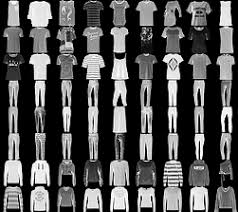

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [3]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

import matplotlib.pyplot as plt

Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

** Pregunta 1.1 *(0.5 puntos)* ** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [6]:
### Tu código aquí ###
print(type(x_train), type(x_test))

print("El nº de imagenes de training es:", 
      x_train.shape[0], 
      "Y su tamaño es:",
      x_train.shape[1], 
      "x", 
      x_train.shape[2], 
      "pixeles")

print("El nº de imagenes de test es:", 
      x_test.shape[0], 
      "Y su tamaño es:",
      x_test.shape[1], 
      "x", 
      x_test.shape[2], 
      "pixeles")

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
El nº de imagenes de training es: 60000 Y su tamaño es: 28 x 28 pixeles
El nº de imagenes de test es: 10000 Y su tamaño es: 28 x 28 pixeles


El nº de imagenes de training es: 60000 Y su tamaño es: 28 x 28 pixeles. 
El nº de imagenes de training es: 10000 Y su tamaño es: 28 x 28 pixeles

**Pregunta 1.2 *(0.5 puntos)* ** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [7]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

El valor máximo de pixel de train[0] es 1.0
El valor minimo de pixel de test[0] es 0.0


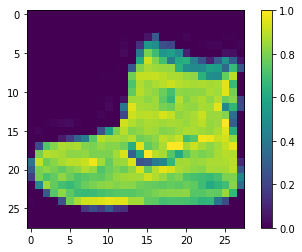

Se trata de una imagen con clase: 9 Ankle boot


In [8]:
### Tu código aquí ###
import numpy as np

#Vamos a analaizar el primer elemento del conjunto de test
print("El valor máximo de pixel de train[0] es", np.amax(x_train[0]))
print("El valor minimo de pixel de test[0] es", np.amin(x_train[0]))

class_label = (
"T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot")

visualize_example(x_train[0])

print("Se trata de una imagen con clase:", y_train[0],  class_label[y_train[0]])

El valor máximo de pixel de train[0] es 1. 
El valor minimo de pixel de train[0] es 0. 
Se trata de imágenes en escala de grises Normalizadas.

En los datos x se guardan las imágenes qe vamos a tratar. En los datos y, se guardan los vetores de clasificacion de clases. Es decir:

Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

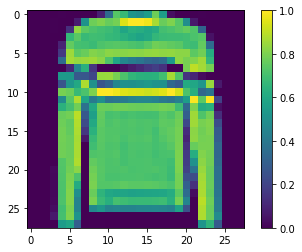

In [9]:
visualize_example(x_train[5])

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(7 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

In [10]:
### Tu código aquí ###
from keras.optimizers import sgd

batch_size = 64
epochs = 20
num_classes = 10

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

#Lo convertimos en un vector one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(128, activation="sigmoid", input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [11]:
param_1 = (128)*784 + 128
print(param_1)
param_2 = (64)*128 + 64
print(param_2)
param_3 = (10)*64 + 10
print(param_3)

100480
8256
650


In [12]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = sgd(),
              metrics = ['accuracy']
             )

In [13]:
history = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 17us/step - loss: 2.2666 - acc: 0.1579 - val_loss: 2.0981 - val_acc: 0.4651
Epoch 2/20
60000/60000 [==============================] - 1s 15us/step - loss: 1.9686 - acc: 0.3094 - val_loss: 1.7282 - val_acc: 0.5545
Epoch 3/20
60000/60000 [==============================] - 1s 15us/step - loss: 1.6368 - acc: 0.4141 - val_loss: 1.4443 - val_acc: 0.6100
Epoch 4/20
60000/60000 [==============================] - 1s 16us/step - loss: 1.4156 - acc: 0.4876 - val_loss: 1.2596 - val_acc: 0.6266
Epoch 5/20
60000/60000 [==============================] - 1s 15us/step - loss: 1.2667 - acc: 0.5369 - val_loss: 1.1338 - val_acc: 0.6507
Epoch 6/20
60000/60000 [==============================] - 1s 15us/step - loss: 1.1619 - acc: 0.5739 - val_loss: 1.0408 - val_acc: 0.6618
Epoch 7/20
60000/60000 [==============================] - 1s 15us/step - loss: 1.0791 - acc: 0.6023 - val_loss: 0.9688 - val_acc

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(1 punto)* **. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [13]:
### Tu código aquí ###
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6403623854160309
Test accuracy: 0.754


**Pregunta 3.2 *(1 punto)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

In [14]:
### Tu código aquí ###
predicts = model.predict(x_test,
              verbose = 1)

print(type(predicts))

print(predicts.shape)

i=0

for value in predicts:
    print("Probabilidad de clase:", 
          np.amax(predicts[i]), 
          "Clase:",
          np.argmax(predicts[i]),
          class_label[np.argmax(predicts[i])]
         )
    i = i + 1

10000/10000 [==============================] - 0s 11us/step
<class 'numpy.ndarray'>
(10000, 10)
Probabilidad de clase: 0.5194518 Clase: 9 Ankle boot
Probabilidad de clase: 0.58471763 Clase: 2 Pullover
Probabilidad de clase: 0.99127406 Clase: 1 Trouser
Probabilidad de clase: 0.98814243 Clase: 1 Trouser
Probabilidad de clase: 0.41812125 Clase: 6 Shirt
Probabilidad de clase: 0.9690615 Clase: 1 Trouser
Probabilidad de clase: 0.41754153 Clase: 2 Pullover
Probabilidad de clase: 0.39669722 Clase: 2 Pullover
Probabilidad de clase: 0.6748314 Clase: 5 Sandal
Probabilidad de clase: 0.8747522 Clase: 7 Sneaker
Probabilidad de clase: 0.47861928 Clase: 2 Pullover
Probabilidad de clase: 0.6390205 Clase: 5 Sandal
Probabilidad de clase: 0.5957586 Clase: 5 Sandal
Probabilidad de clase: 0.94285655 Clase: 3 Dress
Probabilidad de clase: 0.5491782 Clase: 4 Coat
Probabilidad de clase: 0.9522051 Clase: 1 Trouser
Probabilidad de clase: 0.5016809 Clase: 2 Pullover
Probabilidad de clase: 0.4532696 Clase: 2 Pullov

Probabilidad de clase: 0.81277394 Clase: 3 Dress
Probabilidad de clase: 0.9898163 Clase: 1 Trouser
Probabilidad de clase: 0.637605 Clase: 7 Sneaker
Probabilidad de clase: 0.726611 Clase: 5 Sandal
Probabilidad de clase: 0.7577224 Clase: 3 Dress
Probabilidad de clase: 0.9042295 Clase: 3 Dress
Probabilidad de clase: 0.7568676 Clase: 0 T-shirt/top
Probabilidad de clase: 0.9687473 Clase: 1 Trouser
Probabilidad de clase: 0.30688366 Clase: 2 Pullover
Probabilidad de clase: 0.65077305 Clase: 2 Pullover
Probabilidad de clase: 0.7693382 Clase: 9 Ankle boot
Probabilidad de clase: 0.52432895 Clase: 4 Coat
Probabilidad de clase: 0.86591375 Clase: 0 T-shirt/top
Probabilidad de clase: 0.3793673 Clase: 6 Shirt
Probabilidad de clase: 0.66019726 Clase: 1 Trouser
Probabilidad de clase: 0.48859173 Clase: 2 Pullover
Probabilidad de clase: 0.48998728 Clase: 2 Pullover
Probabilidad de clase: 0.7684744 Clase: 0 T-shirt/top
Probabilidad de clase: 0.8831857 Clase: 0 T-shirt/top
Probabilidad de clase: 0.27815527

Probabilidad de clase: 0.55942446 Clase: 2 Pullover
Probabilidad de clase: 0.8812698 Clase: 7 Sneaker
Probabilidad de clase: 0.8025149 Clase: 3 Dress
Probabilidad de clase: 0.5325682 Clase: 2 Pullover
Probabilidad de clase: 0.71812636 Clase: 3 Dress
Probabilidad de clase: 0.9038372 Clase: 8 Bag
Probabilidad de clase: 0.5759294 Clase: 2 Pullover
Probabilidad de clase: 0.54370785 Clase: 2 Pullover
Probabilidad de clase: 0.566523 Clase: 0 T-shirt/top
Probabilidad de clase: 0.7675002 Clase: 7 Sneaker
Probabilidad de clase: 0.78695005 Clase: 3 Dress
Probabilidad de clase: 0.9164786 Clase: 0 T-shirt/top
Probabilidad de clase: 0.7196976 Clase: 7 Sneaker
Probabilidad de clase: 0.63136625 Clase: 8 Bag
Probabilidad de clase: 0.904764 Clase: 8 Bag
Probabilidad de clase: 0.5740894 Clase: 2 Pullover
Probabilidad de clase: 0.9433233 Clase: 9 Ankle boot
Probabilidad de clase: 0.51845884 Clase: 4 Coat
Probabilidad de clase: 0.48847127 Clase: 2 Pullover
Probabilidad de clase: 0.65828204 Clase: 0 T-shir

Probabilidad de clase: 0.4010473 Clase: 4 Coat
Probabilidad de clase: 0.9581027 Clase: 9 Ankle boot
Probabilidad de clase: 0.8188771 Clase: 3 Dress
Probabilidad de clase: 0.9297994 Clase: 5 Sandal
Probabilidad de clase: 0.9687168 Clase: 8 Bag
Probabilidad de clase: 0.6008085 Clase: 5 Sandal
Probabilidad de clase: 0.49155244 Clase: 4 Coat
Probabilidad de clase: 0.5696581 Clase: 7 Sneaker
Probabilidad de clase: 0.5564408 Clase: 2 Pullover
Probabilidad de clase: 0.97068775 Clase: 8 Bag
Probabilidad de clase: 0.7185273 Clase: 5 Sandal
Probabilidad de clase: 0.88333195 Clase: 9 Ankle boot
Probabilidad de clase: 0.3779561 Clase: 3 Dress
Probabilidad de clase: 0.85409635 Clase: 3 Dress
Probabilidad de clase: 0.5487554 Clase: 4 Coat
Probabilidad de clase: 0.49332187 Clase: 7 Sneaker
Probabilidad de clase: 0.98895776 Clase: 1 Trouser
Probabilidad de clase: 0.6532357 Clase: 7 Sneaker
Probabilidad de clase: 0.6066695 Clase: 3 Dress
Probabilidad de clase: 0.69272965 Clase: 5 Sandal
Probabilidad de

Probabilidad de clase: 0.50022346 Clase: 5 Sandal
Probabilidad de clase: 0.5038773 Clase: 4 Coat
Probabilidad de clase: 0.35138792 Clase: 4 Coat
Probabilidad de clase: 0.78590333 Clase: 8 Bag
Probabilidad de clase: 0.39287168 Clase: 6 Shirt
Probabilidad de clase: 0.44967785 Clase: 2 Pullover
Probabilidad de clase: 0.34170157 Clase: 4 Coat
Probabilidad de clase: 0.85492885 Clase: 0 T-shirt/top
Probabilidad de clase: 0.3793364 Clase: 2 Pullover
Probabilidad de clase: 0.3390046 Clase: 6 Shirt
Probabilidad de clase: 0.41786218 Clase: 4 Coat
Probabilidad de clase: 0.3753747 Clase: 8 Bag
Probabilidad de clase: 0.9448647 Clase: 3 Dress
Probabilidad de clase: 0.9295948 Clase: 8 Bag
Probabilidad de clase: 0.43005207 Clase: 6 Shirt
Probabilidad de clase: 0.90832645 Clase: 0 T-shirt/top
Probabilidad de clase: 0.55130345 Clase: 4 Coat
Probabilidad de clase: 0.19893885 Clase: 6 Shirt
Probabilidad de clase: 0.8698285 Clase: 8 Bag
Probabilidad de clase: 0.91245085 Clase: 8 Bag
Probabilidad de clase: 

Probabilidad de clase: 0.60592365 Clase: 4 Coat
Probabilidad de clase: 0.8536947 Clase: 0 T-shirt/top
Probabilidad de clase: 0.7270397 Clase: 0 T-shirt/top
Probabilidad de clase: 0.8964959 Clase: 0 T-shirt/top
Probabilidad de clase: 0.8990059 Clase: 5 Sandal
Probabilidad de clase: 0.9313628 Clase: 7 Sneaker
Probabilidad de clase: 0.43806773 Clase: 6 Shirt
Probabilidad de clase: 0.86633503 Clase: 5 Sandal
Probabilidad de clase: 0.56396866 Clase: 2 Pullover
Probabilidad de clase: 0.45040876 Clase: 0 T-shirt/top
Probabilidad de clase: 0.66054255 Clase: 4 Coat
Probabilidad de clase: 0.44665685 Clase: 4 Coat
Probabilidad de clase: 0.92542607 Clase: 7 Sneaker
Probabilidad de clase: 0.91874796 Clase: 8 Bag
Probabilidad de clase: 0.89815426 Clase: 0 T-shirt/top
Probabilidad de clase: 0.94046456 Clase: 5 Sandal
Probabilidad de clase: 0.9717863 Clase: 1 Trouser
Probabilidad de clase: 0.55254704 Clase: 7 Sneaker
Probabilidad de clase: 0.5996547 Clase: 2 Pullover
Probabilidad de clase: 0.7849419 C

Probabilidad de clase: 0.95329946 Clase: 8 Bag
Probabilidad de clase: 0.9741994 Clase: 8 Bag
Probabilidad de clase: 0.44688424 Clase: 2 Pullover
Probabilidad de clase: 0.6674965 Clase: 3 Dress
Probabilidad de clase: 0.8814117 Clase: 8 Bag
Probabilidad de clase: 0.40330842 Clase: 6 Shirt
Probabilidad de clase: 0.37101942 Clase: 4 Coat
Probabilidad de clase: 0.57963836 Clase: 5 Sandal
Probabilidad de clase: 0.5019373 Clase: 9 Ankle boot
Probabilidad de clase: 0.9060985 Clase: 7 Sneaker
Probabilidad de clase: 0.8852168 Clase: 0 T-shirt/top
Probabilidad de clase: 0.38110182 Clase: 2 Pullover
Probabilidad de clase: 0.3905278 Clase: 6 Shirt
Probabilidad de clase: 0.90503496 Clase: 7 Sneaker
Probabilidad de clase: 0.7525511 Clase: 7 Sneaker
Probabilidad de clase: 0.600252 Clase: 3 Dress
Probabilidad de clase: 0.92293966 Clase: 9 Ankle boot
Probabilidad de clase: 0.48689535 Clase: 4 Coat
Probabilidad de clase: 0.9163302 Clase: 5 Sandal
Probabilidad de clase: 0.9652951 Clase: 9 Ankle boot
Proba

Probabilidad de clase: 0.82814807 Clase: 9 Ankle boot
Probabilidad de clase: 0.75368845 Clase: 0 T-shirt/top
Probabilidad de clase: 0.9890015 Clase: 1 Trouser
Probabilidad de clase: 0.49882463 Clase: 7 Sneaker
Probabilidad de clase: 0.9893751 Clase: 1 Trouser
Probabilidad de clase: 0.3943882 Clase: 4 Coat
Probabilidad de clase: 0.95202386 Clase: 8 Bag
Probabilidad de clase: 0.9678684 Clase: 1 Trouser
Probabilidad de clase: 0.38969713 Clase: 6 Shirt
Probabilidad de clase: 0.96706086 Clase: 9 Ankle boot
Probabilidad de clase: 0.8203912 Clase: 3 Dress
Probabilidad de clase: 0.46258438 Clase: 4 Coat
Probabilidad de clase: 0.884206 Clase: 0 T-shirt/top
Probabilidad de clase: 0.6995271 Clase: 0 T-shirt/top
Probabilidad de clase: 0.47115216 Clase: 5 Sandal
Probabilidad de clase: 0.4057324 Clase: 2 Pullover
Probabilidad de clase: 0.9193764 Clase: 9 Ankle boot
Probabilidad de clase: 0.94696385 Clase: 9 Ankle boot
Probabilidad de clase: 0.7649523 Clase: 5 Sandal
Probabilidad de clase: 0.5188122 

Probabilidad de clase: 0.88391984 Clase: 8 Bag
Probabilidad de clase: 0.89714885 Clase: 5 Sandal
Probabilidad de clase: 0.9035347 Clase: 1 Trouser
Probabilidad de clase: 0.99198806 Clase: 1 Trouser
Probabilidad de clase: 0.55335426 Clase: 2 Pullover
Probabilidad de clase: 0.9653886 Clase: 9 Ankle boot
Probabilidad de clase: 0.5755941 Clase: 4 Coat
Probabilidad de clase: 0.8853727 Clase: 0 T-shirt/top
Probabilidad de clase: 0.88542455 Clase: 5 Sandal
Probabilidad de clase: 0.41250885 Clase: 6 Shirt
Probabilidad de clase: 0.9464837 Clase: 8 Bag
Probabilidad de clase: 0.5908961 Clase: 0 T-shirt/top
Probabilidad de clase: 0.5797014 Clase: 2 Pullover
Probabilidad de clase: 0.96639353 Clase: 9 Ankle boot
Probabilidad de clase: 0.97185117 Clase: 8 Bag
Probabilidad de clase: 0.44312 Clase: 2 Pullover
Probabilidad de clase: 0.43317607 Clase: 4 Coat
Probabilidad de clase: 0.97373927 Clase: 8 Bag
Probabilidad de clase: 0.87398475 Clase: 3 Dress
Probabilidad de clase: 0.9350487 Clase: 8 Bag
Probab

Probabilidad de clase: 0.9897371 Clase: 1 Trouser
Probabilidad de clase: 0.9175218 Clase: 0 T-shirt/top
Probabilidad de clase: 0.42983517 Clase: 6 Shirt
Probabilidad de clase: 0.98386705 Clase: 1 Trouser
Probabilidad de clase: 0.57552326 Clase: 4 Coat
Probabilidad de clase: 0.6495883 Clase: 4 Coat
Probabilidad de clase: 0.576034 Clase: 4 Coat
Probabilidad de clase: 0.9775326 Clase: 8 Bag
Probabilidad de clase: 0.5990603 Clase: 4 Coat
Probabilidad de clase: 0.9400469 Clase: 9 Ankle boot
Probabilidad de clase: 0.8684397 Clase: 0 T-shirt/top
Probabilidad de clase: 0.716788 Clase: 9 Ankle boot
Probabilidad de clase: 0.6243927 Clase: 9 Ankle boot
Probabilidad de clase: 0.85643643 Clase: 5 Sandal
Probabilidad de clase: 0.5651313 Clase: 3 Dress
Probabilidad de clase: 0.49200404 Clase: 6 Shirt
Probabilidad de clase: 0.8534957 Clase: 0 T-shirt/top
Probabilidad de clase: 0.62822706 Clase: 5 Sandal
Probabilidad de clase: 0.82362133 Clase: 0 T-shirt/top
Probabilidad de clase: 0.39372894 Clase: 4 C

Probabilidad de clase: 0.2676923 Clase: 3 Dress
Probabilidad de clase: 0.6678083 Clase: 9 Ankle boot
Probabilidad de clase: 0.35338092 Clase: 6 Shirt
Probabilidad de clase: 0.38467315 Clase: 6 Shirt
Probabilidad de clase: 0.4621673 Clase: 0 T-shirt/top
Probabilidad de clase: 0.9376623 Clase: 8 Bag
Probabilidad de clase: 0.65078276 Clase: 4 Coat
Probabilidad de clase: 0.8260794 Clase: 5 Sandal
Probabilidad de clase: 0.50323224 Clase: 2 Pullover
Probabilidad de clase: 0.88306415 Clase: 9 Ankle boot
Probabilidad de clase: 0.82181036 Clase: 8 Bag
Probabilidad de clase: 0.9680227 Clase: 1 Trouser
Probabilidad de clase: 0.46699038 Clase: 4 Coat
Probabilidad de clase: 0.27467817 Clase: 3 Dress
Probabilidad de clase: 0.38156626 Clase: 6 Shirt
Probabilidad de clase: 0.3682041 Clase: 2 Pullover
Probabilidad de clase: 0.9119199 Clase: 9 Ankle boot
Probabilidad de clase: 0.45845357 Clase: 4 Coat
Probabilidad de clase: 0.6375992 Clase: 3 Dress
Probabilidad de clase: 0.6733593 Clase: 7 Sneaker
Proba

Probabilidad de clase: 0.761877 Clase: 7 Sneaker
Probabilidad de clase: 0.4052327 Clase: 4 Coat
Probabilidad de clase: 0.92768 Clase: 7 Sneaker
Probabilidad de clase: 0.36591893 Clase: 2 Pullover
Probabilidad de clase: 0.6070546 Clase: 5 Sandal
Probabilidad de clase: 0.33423027 Clase: 2 Pullover
Probabilidad de clase: 0.569774 Clase: 9 Ankle boot
Probabilidad de clase: 0.4957294 Clase: 0 T-shirt/top
Probabilidad de clase: 0.5159251 Clase: 3 Dress
Probabilidad de clase: 0.4568689 Clase: 2 Pullover
Probabilidad de clase: 0.926993 Clase: 0 T-shirt/top
Probabilidad de clase: 0.49694532 Clase: 2 Pullover
Probabilidad de clase: 0.620316 Clase: 9 Ankle boot
Probabilidad de clase: 0.9804882 Clase: 8 Bag
Probabilidad de clase: 0.98227614 Clase: 1 Trouser
Probabilidad de clase: 0.842281 Clase: 3 Dress
Probabilidad de clase: 0.9561696 Clase: 8 Bag
Probabilidad de clase: 0.98089373 Clase: 1 Trouser
Probabilidad de clase: 0.6088817 Clase: 5 Sandal
Probabilidad de clase: 0.78788334 Clase: 3 Dress
Pr

Probabilidad de clase: 0.8145292 Clase: 0 T-shirt/top
Probabilidad de clase: 0.7497425 Clase: 0 T-shirt/top
Probabilidad de clase: 0.9815057 Clase: 1 Trouser
Probabilidad de clase: 0.93047583 Clase: 9 Ankle boot
Probabilidad de clase: 0.9107972 Clase: 3 Dress
Probabilidad de clase: 0.9528325 Clase: 9 Ankle boot
Probabilidad de clase: 0.7877759 Clase: 8 Bag
Probabilidad de clase: 0.9668003 Clase: 8 Bag
Probabilidad de clase: 0.47015405 Clase: 6 Shirt
Probabilidad de clase: 0.9338935 Clase: 9 Ankle boot
Probabilidad de clase: 0.5233494 Clase: 4 Coat
Probabilidad de clase: 0.93432355 Clase: 7 Sneaker
Probabilidad de clase: 0.94757646 Clase: 9 Ankle boot
Probabilidad de clase: 0.9741978 Clase: 1 Trouser
Probabilidad de clase: 0.84217817 Clase: 5 Sandal
Probabilidad de clase: 0.98223346 Clase: 8 Bag
Probabilidad de clase: 0.99195623 Clase: 1 Trouser
Probabilidad de clase: 0.79144 Clase: 3 Dress
Probabilidad de clase: 0.3569459 Clase: 6 Shirt
Probabilidad de clase: 0.55820036 Clase: 2 Pullov

Probabilidad de clase: 0.32432786 Clase: 6 Shirt
Probabilidad de clase: 0.78743154 Clase: 9 Ankle boot
Probabilidad de clase: 0.54872924 Clase: 7 Sneaker
Probabilidad de clase: 0.83672523 Clase: 3 Dress
Probabilidad de clase: 0.33790156 Clase: 4 Coat
Probabilidad de clase: 0.9073987 Clase: 0 T-shirt/top
Probabilidad de clase: 0.47981158 Clase: 2 Pullover
Probabilidad de clase: 0.5256994 Clase: 0 T-shirt/top
Probabilidad de clase: 0.7433803 Clase: 3 Dress
Probabilidad de clase: 0.3596863 Clase: 2 Pullover
Probabilidad de clase: 0.86554325 Clase: 8 Bag
Probabilidad de clase: 0.9714039 Clase: 8 Bag
Probabilidad de clase: 0.987432 Clase: 8 Bag
Probabilidad de clase: 0.88327056 Clase: 0 T-shirt/top
Probabilidad de clase: 0.4434532 Clase: 2 Pullover
Probabilidad de clase: 0.8100033 Clase: 3 Dress
Probabilidad de clase: 0.6555157 Clase: 4 Coat
Probabilidad de clase: 0.86071867 Clase: 8 Bag
Probabilidad de clase: 0.47044888 Clase: 6 Shirt
Probabilidad de clase: 0.97157514 Clase: 1 Trouser
Prob

Probabilidad de clase: 0.5630731 Clase: 4 Coat
Probabilidad de clase: 0.5173987 Clase: 5 Sandal
Probabilidad de clase: 0.5927561 Clase: 5 Sandal
Probabilidad de clase: 0.9785362 Clase: 1 Trouser
Probabilidad de clase: 0.40117282 Clase: 6 Shirt
Probabilidad de clase: 0.9311215 Clase: 1 Trouser
Probabilidad de clase: 0.421292 Clase: 2 Pullover
Probabilidad de clase: 0.5665026 Clase: 8 Bag
Probabilidad de clase: 0.37481102 Clase: 6 Shirt
Probabilidad de clase: 0.9857261 Clase: 8 Bag
Probabilidad de clase: 0.9211537 Clase: 9 Ankle boot
Probabilidad de clase: 0.9862322 Clase: 1 Trouser
Probabilidad de clase: 0.45439923 Clase: 6 Shirt
Probabilidad de clase: 0.81318796 Clase: 5 Sandal
Probabilidad de clase: 0.64103943 Clase: 4 Coat
Probabilidad de clase: 0.9807554 Clase: 8 Bag
Probabilidad de clase: 0.9726176 Clase: 1 Trouser
Probabilidad de clase: 0.9124731 Clase: 7 Sneaker
Probabilidad de clase: 0.96653306 Clase: 1 Trouser
Probabilidad de clase: 0.44828096 Clase: 6 Shirt
Probabilidad de cla

Probabilidad de clase: 0.47798184 Clase: 2 Pullover
Probabilidad de clase: 0.5362497 Clase: 2 Pullover
Probabilidad de clase: 0.6334349 Clase: 3 Dress
Probabilidad de clase: 0.47254068 Clase: 4 Coat
Probabilidad de clase: 0.81941855 Clase: 3 Dress
Probabilidad de clase: 0.8132343 Clase: 8 Bag
Probabilidad de clase: 0.5746764 Clase: 7 Sneaker
Probabilidad de clase: 0.59589684 Clase: 2 Pullover
Probabilidad de clase: 0.9422029 Clase: 3 Dress
Probabilidad de clase: 0.40730417 Clase: 2 Pullover
Probabilidad de clase: 0.48817092 Clase: 0 T-shirt/top
Probabilidad de clase: 0.69123834 Clase: 8 Bag
Probabilidad de clase: 0.93926346 Clase: 5 Sandal
Probabilidad de clase: 0.61636 Clase: 4 Coat
Probabilidad de clase: 0.7299389 Clase: 0 T-shirt/top
Probabilidad de clase: 0.9699864 Clase: 1 Trouser
Probabilidad de clase: 0.7748284 Clase: 0 T-shirt/top
Probabilidad de clase: 0.49616575 Clase: 4 Coat
Probabilidad de clase: 0.38133687 Clase: 2 Pullover
Probabilidad de clase: 0.39464733 Clase: 2 Pullov

Probabilidad de clase: 0.7847759 Clase: 0 T-shirt/top
Probabilidad de clase: 0.43615934 Clase: 6 Shirt
Probabilidad de clase: 0.90543276 Clase: 5 Sandal
Probabilidad de clase: 0.35709482 Clase: 6 Shirt
Probabilidad de clase: 0.88914233 Clase: 8 Bag
Probabilidad de clase: 0.9158787 Clase: 3 Dress
Probabilidad de clase: 0.97409815 Clase: 8 Bag
Probabilidad de clase: 0.90174156 Clase: 0 T-shirt/top
Probabilidad de clase: 0.4039966 Clase: 6 Shirt
Probabilidad de clase: 0.94256413 Clase: 9 Ankle boot
Probabilidad de clase: 0.6462947 Clase: 5 Sandal
Probabilidad de clase: 0.9880425 Clase: 1 Trouser
Probabilidad de clase: 0.93827885 Clase: 5 Sandal
Probabilidad de clase: 0.88304865 Clase: 3 Dress
Probabilidad de clase: 0.60114497 Clase: 2 Pullover
Probabilidad de clase: 0.34578493 Clase: 6 Shirt
Probabilidad de clase: 0.83458644 Clase: 5 Sandal
Probabilidad de clase: 0.8663227 Clase: 3 Dress
Probabilidad de clase: 0.46386135 Clase: 0 T-shirt/top
Probabilidad de clase: 0.49528727 Clase: 3 Dres

Probabilidad de clase: 0.2844308 Clase: 5 Sandal
Probabilidad de clase: 0.80360997 Clase: 3 Dress
Probabilidad de clase: 0.7346712 Clase: 7 Sneaker
Probabilidad de clase: 0.8872928 Clase: 3 Dress
Probabilidad de clase: 0.9906061 Clase: 1 Trouser
Probabilidad de clase: 0.44613668 Clase: 4 Coat
Probabilidad de clase: 0.78762287 Clase: 5 Sandal
Probabilidad de clase: 0.918881 Clase: 0 T-shirt/top
Probabilidad de clase: 0.9920284 Clase: 1 Trouser
Probabilidad de clase: 0.9816721 Clase: 8 Bag
Probabilidad de clase: 0.80229247 Clase: 5 Sandal
Probabilidad de clase: 0.92294616 Clase: 8 Bag
Probabilidad de clase: 0.52464145 Clase: 4 Coat
Probabilidad de clase: 0.608603 Clase: 3 Dress
Probabilidad de clase: 0.83984214 Clase: 7 Sneaker
Probabilidad de clase: 0.9779153 Clase: 8 Bag
Probabilidad de clase: 0.9647807 Clase: 9 Ankle boot
Probabilidad de clase: 0.52594924 Clase: 2 Pullover
Probabilidad de clase: 0.48440036 Clase: 4 Coat
Probabilidad de clase: 0.30940756 Clase: 6 Shirt
Probabilidad de 

Probabilidad de clase: 0.46907893 Clase: 4 Coat
Probabilidad de clase: 0.49188063 Clase: 4 Coat
Probabilidad de clase: 0.76590526 Clase: 3 Dress
Probabilidad de clase: 0.89391667 Clase: 3 Dress
Probabilidad de clase: 0.97038573 Clase: 9 Ankle boot
Probabilidad de clase: 0.5483869 Clase: 4 Coat
Probabilidad de clase: 0.71413535 Clase: 9 Ankle boot
Probabilidad de clase: 0.8704063 Clase: 0 T-shirt/top
Probabilidad de clase: 0.92959285 Clase: 8 Bag
Probabilidad de clase: 0.40222797 Clase: 6 Shirt
Probabilidad de clase: 0.5233724 Clase: 9 Ankle boot
Probabilidad de clase: 0.35244757 Clase: 6 Shirt
Probabilidad de clase: 0.4236833 Clase: 1 Trouser
Probabilidad de clase: 0.8945594 Clase: 0 T-shirt/top
Probabilidad de clase: 0.98540246 Clase: 1 Trouser
Probabilidad de clase: 0.84825104 Clase: 3 Dress
Probabilidad de clase: 0.97493726 Clase: 9 Ankle boot
Probabilidad de clase: 0.51609695 Clase: 4 Coat
Probabilidad de clase: 0.48621228 Clase: 2 Pullover
Probabilidad de clase: 0.8971819 Clase: 5

Probabilidad de clase: 0.43009076 Clase: 4 Coat
Probabilidad de clase: 0.51741016 Clase: 2 Pullover
Probabilidad de clase: 0.83482385 Clase: 5 Sandal
Probabilidad de clase: 0.63675344 Clase: 4 Coat
Probabilidad de clase: 0.6359278 Clase: 2 Pullover
Probabilidad de clase: 0.91513354 Clase: 7 Sneaker
Probabilidad de clase: 0.9782955 Clase: 1 Trouser
Probabilidad de clase: 0.4066636 Clase: 6 Shirt
Probabilidad de clase: 0.43767592 Clase: 0 T-shirt/top
Probabilidad de clase: 0.51117975 Clase: 4 Coat
Probabilidad de clase: 0.3554207 Clase: 2 Pullover
Probabilidad de clase: 0.86795354 Clase: 5 Sandal
Probabilidad de clase: 0.39312255 Clase: 2 Pullover
Probabilidad de clase: 0.6712641 Clase: 4 Coat
Probabilidad de clase: 0.43149695 Clase: 6 Shirt
Probabilidad de clase: 0.4441647 Clase: 7 Sneaker
Probabilidad de clase: 0.7906477 Clase: 5 Sandal
Probabilidad de clase: 0.85911065 Clase: 5 Sandal
Probabilidad de clase: 0.9873679 Clase: 1 Trouser
Probabilidad de clase: 0.7563496 Clase: 7 Sneaker
P

Probabilidad de clase: 0.9307441 Clase: 1 Trouser
Probabilidad de clase: 0.898535 Clase: 0 T-shirt/top
Probabilidad de clase: 0.8856436 Clase: 5 Sandal
Probabilidad de clase: 0.6747571 Clase: 0 T-shirt/top
Probabilidad de clase: 0.906038 Clase: 3 Dress
Probabilidad de clase: 0.7668157 Clase: 9 Ankle boot
Probabilidad de clase: 0.59411824 Clase: 7 Sneaker
Probabilidad de clase: 0.95037526 Clase: 9 Ankle boot
Probabilidad de clase: 0.34312826 Clase: 2 Pullover
Probabilidad de clase: 0.6515493 Clase: 0 T-shirt/top
Probabilidad de clase: 0.94699866 Clase: 7 Sneaker
Probabilidad de clase: 0.9912909 Clase: 1 Trouser
Probabilidad de clase: 0.42607445 Clase: 8 Bag
Probabilidad de clase: 0.9198344 Clase: 0 T-shirt/top
Probabilidad de clase: 0.9121488 Clase: 8 Bag
Probabilidad de clase: 0.4659808 Clase: 6 Shirt
Probabilidad de clase: 0.5075149 Clase: 4 Coat
Probabilidad de clase: 0.48282754 Clase: 2 Pullover
Probabilidad de clase: 0.44683963 Clase: 9 Ankle boot
Probabilidad de clase: 0.85051936 

Probabilidad de clase: 0.99055076 Clase: 1 Trouser
Probabilidad de clase: 0.98610675 Clase: 8 Bag
Probabilidad de clase: 0.9150803 Clase: 7 Sneaker
Probabilidad de clase: 0.6859302 Clase: 5 Sandal
Probabilidad de clase: 0.4043221 Clase: 2 Pullover
Probabilidad de clase: 0.8858186 Clase: 5 Sandal
Probabilidad de clase: 0.8604394 Clase: 3 Dress
Probabilidad de clase: 0.8863461 Clase: 7 Sneaker
Probabilidad de clase: 0.54705393 Clase: 4 Coat
Probabilidad de clase: 0.45330375 Clase: 4 Coat
Probabilidad de clase: 0.9020761 Clase: 5 Sandal
Probabilidad de clase: 0.72604674 Clase: 5 Sandal
Probabilidad de clase: 0.36302322 Clase: 4 Coat
Probabilidad de clase: 0.82903063 Clase: 9 Ankle boot
Probabilidad de clase: 0.939413 Clase: 9 Ankle boot
Probabilidad de clase: 0.91566914 Clase: 1 Trouser
Probabilidad de clase: 0.92323565 Clase: 9 Ankle boot
Probabilidad de clase: 0.9534925 Clase: 5 Sandal
Probabilidad de clase: 0.9164111 Clase: 9 Ankle boot
Probabilidad de clase: 0.42149246 Clase: 2 Pullov

Probabilidad de clase: 0.60029644 Clase: 2 Pullover
Probabilidad de clase: 0.81126213 Clase: 3 Dress
Probabilidad de clase: 0.5823819 Clase: 2 Pullover
Probabilidad de clase: 0.65129435 Clase: 3 Dress
Probabilidad de clase: 0.9040748 Clase: 0 T-shirt/top
Probabilidad de clase: 0.9513914 Clase: 8 Bag
Probabilidad de clase: 0.6781273 Clase: 3 Dress
Probabilidad de clase: 0.66689444 Clase: 5 Sandal
Probabilidad de clase: 0.9898663 Clase: 1 Trouser
Probabilidad de clase: 0.42869693 Clase: 2 Pullover
Probabilidad de clase: 0.49342617 Clase: 3 Dress
Probabilidad de clase: 0.79326385 Clase: 8 Bag
Probabilidad de clase: 0.644086 Clase: 2 Pullover
Probabilidad de clase: 0.69224966 Clase: 1 Trouser
Probabilidad de clase: 0.48088214 Clase: 2 Pullover
Probabilidad de clase: 0.98076665 Clase: 1 Trouser
Probabilidad de clase: 0.9617622 Clase: 1 Trouser
Probabilidad de clase: 0.84931827 Clase: 9 Ankle boot
Probabilidad de clase: 0.5592781 Clase: 0 T-shirt/top
Probabilidad de clase: 0.825537 Clase: 7 

Probabilidad de clase: 0.762296 Clase: 7 Sneaker
Probabilidad de clase: 0.47185925 Clase: 7 Sneaker
Probabilidad de clase: 0.796686 Clase: 0 T-shirt/top
Probabilidad de clase: 0.9770244 Clase: 1 Trouser
Probabilidad de clase: 0.41946152 Clase: 2 Pullover
Probabilidad de clase: 0.9684784 Clase: 1 Trouser
Probabilidad de clase: 0.4780829 Clase: 3 Dress
Probabilidad de clase: 0.5200372 Clase: 2 Pullover
Probabilidad de clase: 0.40696236 Clase: 2 Pullover
Probabilidad de clase: 0.51992095 Clase: 4 Coat
Probabilidad de clase: 0.46447763 Clase: 2 Pullover
Probabilidad de clase: 0.9446911 Clase: 1 Trouser
Probabilidad de clase: 0.95801693 Clase: 7 Sneaker
Probabilidad de clase: 0.34307742 Clase: 6 Shirt
Probabilidad de clase: 0.4820086 Clase: 2 Pullover
Probabilidad de clase: 0.4424369 Clase: 2 Pullover
Probabilidad de clase: 0.35733765 Clase: 6 Shirt
Probabilidad de clase: 0.9298551 Clase: 1 Trouser
Probabilidad de clase: 0.9479141 Clase: 8 Bag
Probabilidad de clase: 0.527044 Clase: 2 Pullov

Probabilidad de clase: 0.68717873 Clase: 9 Ankle boot
Probabilidad de clase: 0.8505714 Clase: 3 Dress
Probabilidad de clase: 0.8210381 Clase: 8 Bag
Probabilidad de clase: 0.96865314 Clase: 9 Ankle boot
Probabilidad de clase: 0.5270586 Clase: 0 T-shirt/top
Probabilidad de clase: 0.5245648 Clase: 2 Pullover
Probabilidad de clase: 0.4130495 Clase: 1 Trouser
Probabilidad de clase: 0.5457352 Clase: 4 Coat
Probabilidad de clase: 0.82240564 Clase: 5 Sandal
Probabilidad de clase: 0.5488774 Clase: 9 Ankle boot
Probabilidad de clase: 0.6130574 Clase: 0 T-shirt/top
Probabilidad de clase: 0.55969244 Clase: 4 Coat
Probabilidad de clase: 0.52197254 Clase: 3 Dress
Probabilidad de clase: 0.95654285 Clase: 9 Ankle boot
Probabilidad de clase: 0.70006955 Clase: 5 Sandal
Probabilidad de clase: 0.71743983 Clase: 7 Sneaker
Probabilidad de clase: 0.3972664 Clase: 2 Pullover
Probabilidad de clase: 0.51174873 Clase: 0 T-shirt/top
Probabilidad de clase: 0.92639965 Clase: 5 Sandal
Probabilidad de clase: 0.917891

Probabilidad de clase: 0.8902798 Clase: 9 Ankle boot
Probabilidad de clase: 0.8347425 Clase: 8 Bag
Probabilidad de clase: 0.81498605 Clase: 7 Sneaker
Probabilidad de clase: 0.48518887 Clase: 3 Dress
Probabilidad de clase: 0.44305646 Clase: 5 Sandal
Probabilidad de clase: 0.5247018 Clase: 4 Coat
Probabilidad de clase: 0.9506159 Clase: 1 Trouser
Probabilidad de clase: 0.49870273 Clase: 2 Pullover
Probabilidad de clase: 0.44571567 Clase: 0 T-shirt/top
Probabilidad de clase: 0.7345896 Clase: 8 Bag
Probabilidad de clase: 0.8845487 Clase: 0 T-shirt/top
Probabilidad de clase: 0.5996434 Clase: 3 Dress
Probabilidad de clase: 0.7483315 Clase: 0 T-shirt/top
Probabilidad de clase: 0.57681966 Clase: 2 Pullover
Probabilidad de clase: 0.7301402 Clase: 3 Dress
Probabilidad de clase: 0.74256545 Clase: 5 Sandal
Probabilidad de clase: 0.92589265 Clase: 9 Ankle boot
Probabilidad de clase: 0.6557146 Clase: 5 Sandal
Probabilidad de clase: 0.9601011 Clase: 8 Bag
Probabilidad de clase: 0.9356143 Clase: 9 Ankl

Probabilidad de clase: 0.53176385 Clase: 2 Pullover
Probabilidad de clase: 0.5740921 Clase: 2 Pullover
Probabilidad de clase: 0.47541 Clase: 4 Coat
Probabilidad de clase: 0.831611 Clase: 0 T-shirt/top
Probabilidad de clase: 0.9890043 Clase: 1 Trouser
Probabilidad de clase: 0.49425858 Clase: 4 Coat
Probabilidad de clase: 0.8536045 Clase: 3 Dress
Probabilidad de clase: 0.9488052 Clase: 9 Ankle boot
Probabilidad de clase: 0.54490024 Clase: 4 Coat
Probabilidad de clase: 0.9222724 Clase: 0 T-shirt/top
Probabilidad de clase: 0.82795215 Clase: 3 Dress
Probabilidad de clase: 0.43131426 Clase: 4 Coat
Probabilidad de clase: 0.53403866 Clase: 2 Pullover
Probabilidad de clase: 0.53465706 Clase: 0 T-shirt/top
Probabilidad de clase: 0.9082576 Clase: 9 Ankle boot
Probabilidad de clase: 0.47092813 Clase: 4 Coat
Probabilidad de clase: 0.87309575 Clase: 7 Sneaker
Probabilidad de clase: 0.44005498 Clase: 2 Pullover
Probabilidad de clase: 0.9624233 Clase: 5 Sandal
Probabilidad de clase: 0.46371755 Clase: 

Probabilidad de clase: 0.49860853 Clase: 7 Sneaker
Probabilidad de clase: 0.86628807 Clase: 7 Sneaker
Probabilidad de clase: 0.92952085 Clase: 1 Trouser
Probabilidad de clase: 0.956977 Clase: 9 Ankle boot
Probabilidad de clase: 0.35369158 Clase: 2 Pullover
Probabilidad de clase: 0.62836736 Clase: 2 Pullover
Probabilidad de clase: 0.9899478 Clase: 1 Trouser
Probabilidad de clase: 0.59143287 Clase: 9 Ankle boot
Probabilidad de clase: 0.9896672 Clase: 1 Trouser
Probabilidad de clase: 0.8308491 Clase: 9 Ankle boot
Probabilidad de clase: 0.68242985 Clase: 0 T-shirt/top
Probabilidad de clase: 0.55309653 Clase: 1 Trouser
Probabilidad de clase: 0.40624723 Clase: 0 T-shirt/top
Probabilidad de clase: 0.8070426 Clase: 3 Dress
Probabilidad de clase: 0.5666635 Clase: 2 Pullover
Probabilidad de clase: 0.48151904 Clase: 7 Sneaker
Probabilidad de clase: 0.90507185 Clase: 3 Dress
Probabilidad de clase: 0.94890386 Clase: 9 Ankle boot
Probabilidad de clase: 0.8316191 Clase: 3 Dress
Probabilidad de clase:

Probabilidad de clase: 0.8829209 Clase: 3 Dress
Probabilidad de clase: 0.44059908 Clase: 4 Coat
Probabilidad de clase: 0.5572393 Clase: 4 Coat
Probabilidad de clase: 0.7107806 Clase: 4 Coat
Probabilidad de clase: 0.3306375 Clase: 0 T-shirt/top
Probabilidad de clase: 0.6758708 Clase: 3 Dress
Probabilidad de clase: 0.5929569 Clase: 4 Coat
Probabilidad de clase: 0.6921513 Clase: 5 Sandal
Probabilidad de clase: 0.9760844 Clase: 1 Trouser
Probabilidad de clase: 0.92890906 Clase: 7 Sneaker
Probabilidad de clase: 0.43562335 Clase: 7 Sneaker
Probabilidad de clase: 0.44138074 Clase: 2 Pullover
Probabilidad de clase: 0.71944726 Clase: 5 Sandal
Probabilidad de clase: 0.9138357 Clase: 7 Sneaker
Probabilidad de clase: 0.65954876 Clase: 9 Ankle boot
Probabilidad de clase: 0.9669694 Clase: 9 Ankle boot
Probabilidad de clase: 0.8757118 Clase: 9 Ankle boot
Probabilidad de clase: 0.9506274 Clase: 9 Ankle boot
Probabilidad de clase: 0.52480596 Clase: 2 Pullover
Probabilidad de clase: 0.6931405 Clase: 0 T

Probabilidad de clase: 0.97972727 Clase: 1 Trouser
Probabilidad de clase: 0.9676568 Clase: 1 Trouser
Probabilidad de clase: 0.97932136 Clase: 8 Bag
Probabilidad de clase: 0.9451202 Clase: 9 Ankle boot
Probabilidad de clase: 0.3809049 Clase: 2 Pullover
Probabilidad de clase: 0.5967271 Clase: 4 Coat
Probabilidad de clase: 0.53019464 Clase: 2 Pullover
Probabilidad de clase: 0.92099303 Clase: 3 Dress
Probabilidad de clase: 0.9291784 Clase: 3 Dress
Probabilidad de clase: 0.492072 Clase: 3 Dress
Probabilidad de clase: 0.92956907 Clase: 7 Sneaker
Probabilidad de clase: 0.97759855 Clase: 1 Trouser
Probabilidad de clase: 0.9206829 Clase: 8 Bag
Probabilidad de clase: 0.8946961 Clase: 8 Bag
Probabilidad de clase: 0.66873795 Clase: 5 Sandal
Probabilidad de clase: 0.42913714 Clase: 0 T-shirt/top
Probabilidad de clase: 0.29152247 Clase: 3 Dress
Probabilidad de clase: 0.80729616 Clase: 7 Sneaker
Probabilidad de clase: 0.8091789 Clase: 7 Sneaker
Probabilidad de clase: 0.9887998 Clase: 1 Trouser
Probab

Probabilidad de clase: 0.7802152 Clase: 7 Sneaker
Probabilidad de clase: 0.5669899 Clase: 4 Coat
Probabilidad de clase: 0.94213194 Clase: 7 Sneaker
Probabilidad de clase: 0.5744509 Clase: 0 T-shirt/top
Probabilidad de clase: 0.59820837 Clase: 1 Trouser
Probabilidad de clase: 0.45457712 Clase: 7 Sneaker
Probabilidad de clase: 0.9514945 Clase: 8 Bag
Probabilidad de clase: 0.95798934 Clase: 8 Bag
Probabilidad de clase: 0.94474655 Clase: 7 Sneaker
Probabilidad de clase: 0.89959973 Clase: 0 T-shirt/top
Probabilidad de clase: 0.89602965 Clase: 1 Trouser
Probabilidad de clase: 0.48112208 Clase: 2 Pullover
Probabilidad de clase: 0.9168698 Clase: 0 T-shirt/top
Probabilidad de clase: 0.9487152 Clase: 9 Ankle boot
Probabilidad de clase: 0.92434824 Clase: 7 Sneaker
Probabilidad de clase: 0.5340153 Clase: 5 Sandal
Probabilidad de clase: 0.9245965 Clase: 9 Ankle boot
Probabilidad de clase: 0.98988086 Clase: 1 Trouser
Probabilidad de clase: 0.5006752 Clase: 2 Pullover
Probabilidad de clase: 0.8749053

Probabilidad de clase: 0.34049112 Clase: 2 Pullover
Probabilidad de clase: 0.6238802 Clase: 2 Pullover
Probabilidad de clase: 0.93437815 Clase: 5 Sandal
Probabilidad de clase: 0.3669608 Clase: 6 Shirt
Probabilidad de clase: 0.931025 Clase: 9 Ankle boot
Probabilidad de clase: 0.75588864 Clase: 0 T-shirt/top
Probabilidad de clase: 0.4154639 Clase: 5 Sandal
Probabilidad de clase: 0.98374397 Clase: 1 Trouser
Probabilidad de clase: 0.97906345 Clase: 1 Trouser
Probabilidad de clase: 0.8207515 Clase: 7 Sneaker
Probabilidad de clase: 0.96715 Clase: 9 Ankle boot
Probabilidad de clase: 0.9054814 Clase: 0 T-shirt/top
Probabilidad de clase: 0.97888935 Clase: 1 Trouser
Probabilidad de clase: 0.38680416 Clase: 6 Shirt
Probabilidad de clase: 0.49934307 Clase: 5 Sandal
Probabilidad de clase: 0.8357684 Clase: 7 Sneaker
Probabilidad de clase: 0.44065148 Clase: 4 Coat
Probabilidad de clase: 0.5773881 Clase: 2 Pullover
Probabilidad de clase: 0.79738075 Clase: 3 Dress
Probabilidad de clase: 0.73971504 Clas

Probabilidad de clase: 0.7380311 Clase: 7 Sneaker
Probabilidad de clase: 0.9332023 Clase: 1 Trouser
Probabilidad de clase: 0.42053172 Clase: 2 Pullover
Probabilidad de clase: 0.8278509 Clase: 7 Sneaker
Probabilidad de clase: 0.8073916 Clase: 0 T-shirt/top
Probabilidad de clase: 0.9710142 Clase: 9 Ankle boot
Probabilidad de clase: 0.48578486 Clase: 3 Dress
Probabilidad de clase: 0.41318762 Clase: 4 Coat
Probabilidad de clase: 0.9566945 Clase: 9 Ankle boot
Probabilidad de clase: 0.723179 Clase: 0 T-shirt/top
Probabilidad de clase: 0.60515434 Clase: 4 Coat
Probabilidad de clase: 0.27535534 Clase: 2 Pullover
Probabilidad de clase: 0.35808837 Clase: 6 Shirt
Probabilidad de clase: 0.94445926 Clase: 5 Sandal
Probabilidad de clase: 0.92777944 Clase: 9 Ankle boot
Probabilidad de clase: 0.9731363 Clase: 9 Ankle boot
Probabilidad de clase: 0.39801157 Clase: 2 Pullover
Probabilidad de clase: 0.4471736 Clase: 6 Shirt
Probabilidad de clase: 0.50675184 Clase: 9 Ankle boot
Probabilidad de clase: 0.855

Probabilidad de clase: 0.96131325 Clase: 8 Bag
Probabilidad de clase: 0.8787285 Clase: 3 Dress
Probabilidad de clase: 0.98462915 Clase: 8 Bag
Probabilidad de clase: 0.94233674 Clase: 9 Ankle boot
Probabilidad de clase: 0.8392535 Clase: 3 Dress
Probabilidad de clase: 0.92677927 Clase: 8 Bag
Probabilidad de clase: 0.9213174 Clase: 0 T-shirt/top
Probabilidad de clase: 0.539471 Clase: 2 Pullover
Probabilidad de clase: 0.9922322 Clase: 1 Trouser
Probabilidad de clase: 0.9853593 Clase: 8 Bag
Probabilidad de clase: 0.4530443 Clase: 2 Pullover
Probabilidad de clase: 0.44456023 Clase: 4 Coat
Probabilidad de clase: 0.6377769 Clase: 0 T-shirt/top
Probabilidad de clase: 0.85340303 Clase: 0 T-shirt/top
Probabilidad de clase: 0.9380876 Clase: 9 Ankle boot
Probabilidad de clase: 0.5149862 Clase: 7 Sneaker
Probabilidad de clase: 0.33528158 Clase: 6 Shirt
Probabilidad de clase: 0.9818233 Clase: 1 Trouser
Probabilidad de clase: 0.52562237 Clase: 5 Sandal
Probabilidad de clase: 0.9833787 Clase: 1 Trouser

Ver código. Para cada vector de probabilidades, cogemos el valor máximo predicho y su equivalencia en la lista de etiquetas.